This notebook compares the writing style of four different reviews datasets -- yelp, amazon find food, trip advisor, imdb.
1. Text length
2. Important words from high-rating and low-rating reviews by tf-idf. 

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
from utils import read_json

In [4]:
%%time

yelp_review= read_json('yelp-dataset/yelp_academic_dataset_review.json')
yelp_review["text_length"] = yelp_review["text"].apply(lambda x: len(x.split(" ")))

CPU times: user 2min 10s, sys: 18.7 s, total: 2min 28s
Wall time: 3min 22s


In [5]:
amazon_review = pd.read_csv('amazon-fine-food-reviews/Reviews.csv')
amazon_review["text_length"] = amazon_review["Text"].apply(lambda x: len(x.split(" ")))
trip_review = pd.read_csv('trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
trip_review["text_length"] = trip_review["Review"].apply(lambda x: len(x.split(" ")))
imdb_review = pd.read_csv('imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
imdb_review["text_length"] = imdb_review["review"].apply(lambda x: len(x.split(" ")))

In [7]:
yelp_high_rating_corpus = yelp_review[yelp_review["stars"] >= 4]
yelp_low_rating_corpus = yelp_review[yelp_review["stars"] < 3]
len(yelp_high_rating_corpus), len(yelp_low_rating_corpus)

(4684545, 1613801)

In [8]:
amazon_high_rating_corpus = amazon_review[amazon_review["Score"] >= 4]
amazon_low_rating_corpus = amazon_review[amazon_review["Score"] < 3]
len(amazon_high_rating_corpus), len(amazon_low_rating_corpus)

(443777, 82037)

In [9]:
trip_high_rating_corpus = trip_review[trip_review["Rating"] >= 4]
trip_low_rating_corpus = trip_review[trip_review["Rating"] < 3]
len(trip_high_rating_corpus), len(trip_low_rating_corpus)

(15093, 3214)

In [10]:
imdb_high_rating_corpus = imdb_review[imdb_review["sentiment"] == "positive"]
imdb_low_rating_corpus = imdb_review[imdb_review["sentiment"] == "negative"]
len(imdb_high_rating_corpus), len(imdb_low_rating_corpus)

(25000, 25000)

<Figure size 640x480 with 0 Axes>

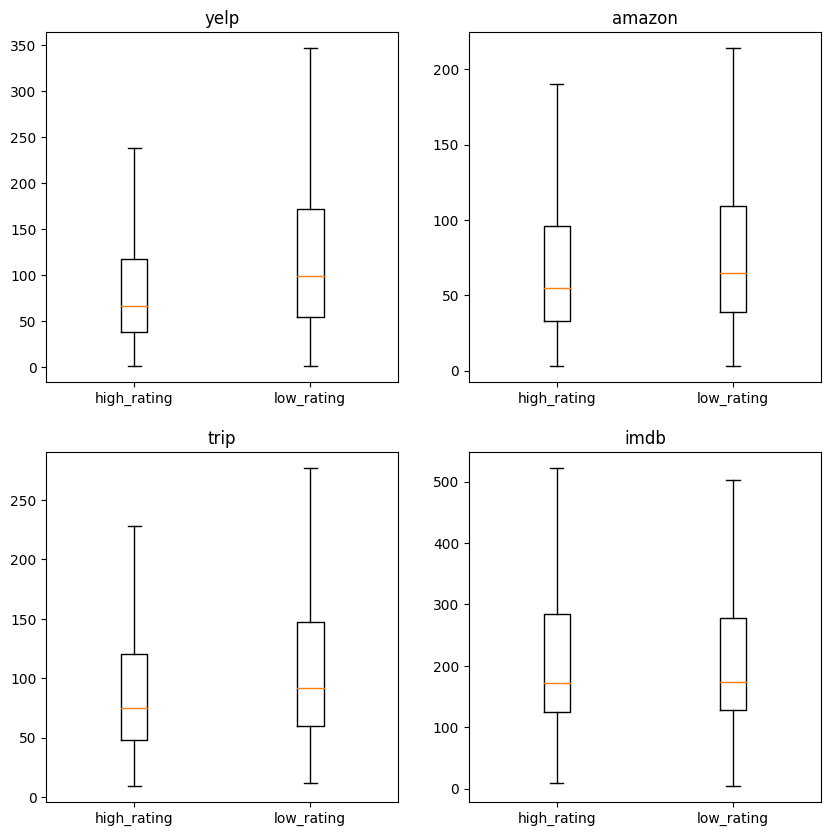

In [11]:
fig = plt.figure()
plt.figure(figsize=(10,10))
for i, (high_rating_corpus, low_rating_corpus, dataset_name) in enumerate(zip(
    [yelp_high_rating_corpus, amazon_high_rating_corpus, trip_high_rating_corpus, imdb_high_rating_corpus],
    [yelp_low_rating_corpus, amazon_low_rating_corpus, trip_low_rating_corpus, imdb_low_rating_corpus],
    ["yelp", "amazon", "trip", "imdb"]
)):
    plt.subplot(221 + i)
    plt.title(dataset_name)
    plt.boxplot(
        [high_rating_corpus.text_length, low_rating_corpus.text_length], 
        labels=("high_rating", "low_rating"),
        showfliers=False
    )
